<a href="https://colab.research.google.com/github/vgeneva/EKG/blob/main/EKG_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECG/EKG information
wfdb lybrary in python.

In [17]:
!pip install wfdb

In [18]:
import os
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# MIT - BIH dataset

The MIT-BIH Arrhythmia Database is one of the most widely used datasets for research in electrocardiography (ECG). It contains 48 half-hour recordings of two-channel ECG signals from 47 different patients, primarily from the Beth Israel Hospital in Boston, Massachusetts, recorded between 1975 and 1979. The dataset includes a variety of heart arrhythmias and normal heartbeats, making it essential for developing and testing algorithms for arrhythmia detection, classification, and ECG signal processing.

Each record typically includes two ECG leads (e.g., MLII and V5) and is annotated with beat labels, identifying different types of heartbeats. It has been a benchmark dataset for evaluating automatic ECG analysis systems.

Thank you https://github.com/mikkelhartmann/ecg-analysis-mit-bih/blob/master/MIT-BIH-database.ipynb#:~:text=The%20MIT%2DBIH%20dataset,download%20and%20read%20the%20data.

In [20]:
if os.path.isdir("mitdb"):
  print("The MIT-BIH dataset has already been downloaded.")
else:
  wfdb.dl_database('mitdb', 'mitdb')

Generating record list for: 100
Generating record list for: 101
Generating record list for: 102
Generating record list for: 103
Generating record list for: 104
Generating record list for: 105
Generating record list for: 106
Generating record list for: 107
Generating record list for: 108
Generating record list for: 109
Generating record list for: 111
Generating record list for: 112
Generating record list for: 113
Generating record list for: 114
Generating record list for: 115
Generating record list for: 116
Generating record list for: 117
Generating record list for: 118
Generating record list for: 119
Generating record list for: 121
Generating record list for: 122
Generating record list for: 123
Generating record list for: 124
Generating record list for: 200
Generating record list for: 201
Generating record list for: 202
Generating record list for: 203
Generating record list for: 205
Generating record list for: 207
Generating record list for: 208
Generating record list for: 209
Generati

# Understanding the files
record is part of the wfdb library functionality. I've downloaded the files, now I am looking at the first record.

In [24]:
record

(array([[-0.145, -0.065],
        [-0.145, -0.065],
        [-0.145, -0.065],
        ...,
        [ 0.875,  0.555],
        [ 0.925,  0.21 ],
        [ 0.795, -0.125]]),
 {'fs': 360,
  'sig_len': 3000,
  'n_sig': 2,
  'base_date': None,
  'base_time': None,
  'units': ['mV', 'mV'],
  'sig_name': ['MLII', 'V5'],
  'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal']})

In [25]:
record[0]

array([[-0.145, -0.065],
       [-0.145, -0.065],
       [-0.145, -0.065],
       ...,
       [ 0.875,  0.555],
       [ 0.925,  0.21 ],
       [ 0.795, -0.125]])

In [27]:
len(record)

2

Here you can see that his patient has MLII and V5 leads only. There are usually 12 leads on the body when recording the ECG.

The 12-lead ECG is the standard for a comprehensive view of the heart's electrical activity. It combines three limb leads (I, II, III), three augmented limb leads (aVR, aVL, aVF), and six precordial leads (V1-V6), providing a 360-degree view of the heart.

Each ECG lead provides a view of the heart’s electrical activity from a different angle or perspective. The electrical impulses of the heart are recorded by electrodes placed on the body, and the configuration of these electrodes defines the lead. Each lead captures a unique projection of the heart's electrical signal, giving cardiologists insight into different aspects of heart function.

Lead II (MLII): Provides the clearest and most stable signal for continuous monitoring, often used in telemetry and during surgeries.

Precordial Leads (V1-V6): Essential for diagnosing acute coronary syndromes, including anterior and lateral wall infarctions.



record[0] has these leads:

Lead II (MLII) records the difference in electrical potential between the right arm (negative electrode) and the left leg (positive electrode). It is commonly used because it provides a clear view of the heart's electrical axis, particularly the P waves and QRS complex.


Lead V5 is part of the precordial (chest) leads and is placed on the left side of the chest. It provides a horizontal view of the heart, focusing on the lateral aspect of the left ventricle.

In [29]:
record[1]

{'fs': 360,
 'sig_len': 3000,
 'n_sig': 2,
 'base_date': None,
 'base_time': None,
 'units': ['mV', 'mV'],
 'sig_name': ['MLII', 'V5'],
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal']}

# Plotting

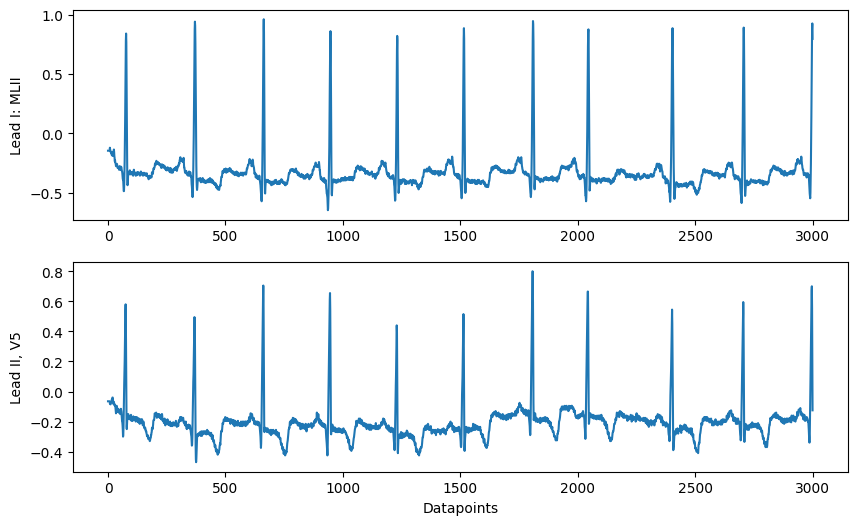

In [30]:
fig, ax = plt.subplots(nrows = 2, figsize = (10, 6))
I = record[0][:,0]
II = record[0][:,1]
ax[0].plot(I)
ax[1].plot(II)
ax[0].set_ylabel("Lead I: MLII")
ax[1].set_xlabel("Datapoints")
ax[1].set_ylabel('Lead II, V5')
plt.show()